In [100]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imutils
from imutils.object_detection import non_max_suppression
import cvlib as cv
from cvlib.object_detection import draw_bbox

In [10]:
imPath = '../Images/family.jpg'
im = cv2.imread(imPath)

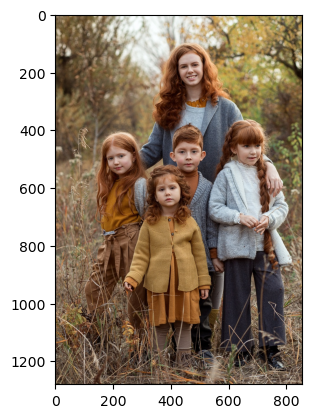

In [11]:
plt.imshow(im[:,:,::-1])

In [12]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [49]:
(r,w) = hog.detectMultiScale(im, winStride=(4,4),padding=(16,16),scale=1.5)

In [50]:
# Traversing through each bounding box found
rects = np.array([[x,y,x+w,y+h] for (x,y,w,h) in r])

In [51]:
rects_NMS = non_max_suppression(rects, probs=None,overlapThresh=0.6)

In [52]:
for (x1,y1,x2,y2) in rects_NMS:
    cv2.rectangle(im,(x1,y1),(x2,y2),(0,0,255),2)

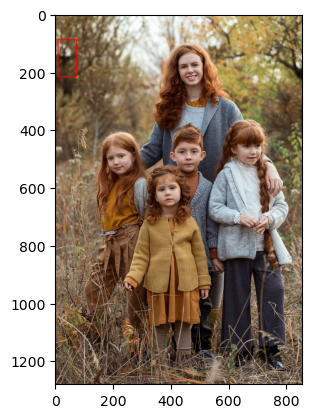

In [53]:
plt.imshow(im[:,:,::-1])
# This person detector sucks

# Facial Detection

In [62]:
imPath = '../Images/family.jpg'
im = cv2.imread(imPath)

In [66]:
bbox , conf = cv.detect_face(im)

In [67]:
bbox

[[426, 134, 511, 247],
 [413, 427, 505, 543],
 [619, 415, 717, 525],
 [345, 556, 434, 668],
 [180, 452, 267, 553]]

In [68]:
conf

[0.9979842, 0.99545324, 0.98911285, 0.97323984, 0.96874636]

In [69]:
labels = []
for i in range(len(conf)):
    labels.append('person')

In [92]:
im2 = draw_bbox(im,bbox,labels,conf)

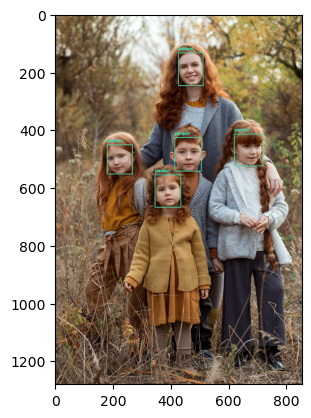

In [93]:
plt.imshow(im2[:,:,::-1])

In [94]:
imPath = '../Images/cats.png'
im2 = cv2.imread(imPath)

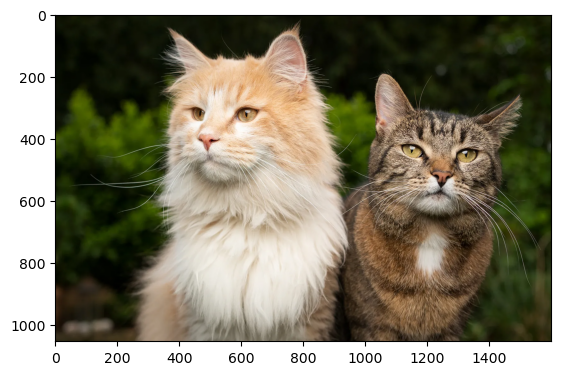

In [95]:
plt.imshow(im2[:,:,::-1])

In [101]:
bbox , labels, conf = cv.detect_common_objects(im2)

In [102]:
labels

['cat', 'cat']

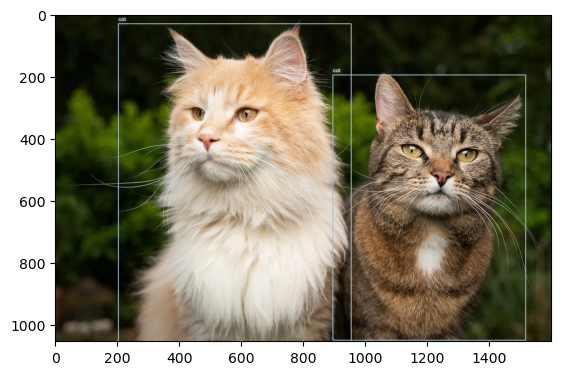

In [103]:
im3 = draw_bbox(im2,bbox,labels,conf)
plt.imshow(im3[:,:,::-1])

In [104]:
bbox , labels, conf = cv.detect_common_objects(im)

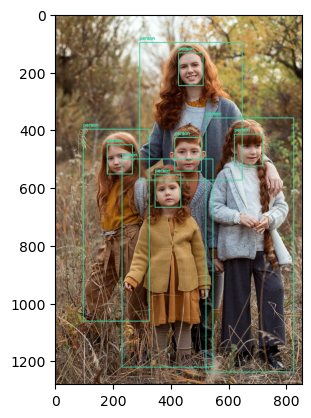

In [105]:
im3 = draw_bbox(im,bbox,labels,conf)
plt.imshow(im3[:,:,::-1])